In [ ]:
# Libraries for the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import warnings

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Dataset is available on the google drive for retrieval. (4 GB of Yelp.csv)
url = 'https://drive.google.com/file/d/14eb_pHWaMMT8tP1paq0pVsfdHs36O9jK/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
# Display data  
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
# Classify and separate x and y
x = df['text']
y = df['stars']

#Given text and corresponding star is given as:
print('TEXT: ', x[0])
print('\n')
print('Corresponding star: {}\n'.format(y[0]))

TEXT:  My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


Corresponding star: 5



Text(0.5, 0, 'Stars')

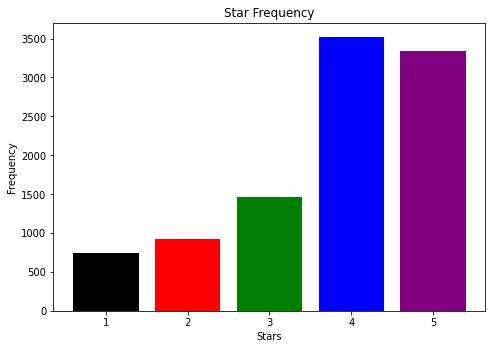

In [ ]:
#Frequency of stars in the dataset
frq = [0, 0, 0, 0, 0]
for i in y:
  if (i == 1):
    frq[0] += 1
  elif (i == 2):
    frq[1] += 1
  elif (i == 3):
    frq[2] += 1
  elif (i == 4):
    frq[3]  += 1
  else:
    frq[4] += 1

# Bar plot of frequency
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
strs = [1, 2, 3, 4, 5]
vals = [frq[0], frq[1], frq[2], frq[3], frq[4]]
ax.bar(strs, vals, color = ['black', 'red', 'green', 'blue', 'purple'])
plt.title('Star Frequency')
plt.ylabel('Frequency')
plt.xlabel('Stars')

In [ ]:
#Actual Figures of each star's frequency
print('Frequency Figures: ')
print('Star 1: {}'.format(frq[0]))
print('Star 2: {}'.format(frq[1]))
print('Star 3: {}'.format(frq[2]))
print('Star 4: {}'.format(frq[3]))
print('Star 5: {}'.format(frq[4]))

Frequency Figures: 
Star 1: 749
Star 2: 927
Star 3: 1461
Star 4: 3526
Star 5: 3337


In [ ]:
# New dataframe
select_Col = df[["text", "stars"]]

newDf = select_Col.copy()

# Normalize all dataset to become equal to 749 
one_df = newDf.query("stars == 1 ").sample(n=749)

two_df = newDf.query("stars == 2 ").sample(n=749)

three_df = newDf.query("stars == 3").sample(n=749)

four_df = newDf.query("stars == 4").sample(n=749)

five_df = newDf.query("stars == 5").sample(n=749)

#Concat all data 
mrg = pd.concat([one_df, two_df, three_df, four_df, five_df])

print(mrg)

                                                   text  stars
6648  Worst, slow service ever....especially with al...      1
874   We went to American Junkie after we found a 50...      1
468   My family and I ate here just a few days ago. ...      1
8157  Very nice location but food was awful.  Had a ...      1
8615  I guess this is an east coast/midwest thing be...      1
...                                                 ...    ...
5622  Impressive!   I dined at House of Tricks last ...      5
6982  The best Vietnamese I have ever had. Very auth...      5
7800  On top of how good the food is, their customer...      5
600   After reading the great reviews and getting pl...      5
6329  This place is the best! They stopped doing tac...      5

[3745 rows x 2 columns]


In [ ]:
from sklearn.utils import shuffle

mrg = shuffle(mrg)

mrg.reset_index()

new_x  = mrg['text']
new_y = mrg['stars']


In [ ]:
# Frequency of each star after normalizing
new_frq = [0, 0, 0, 0, 0]
for i in new_y:
  if (i == 1):
    new_frq[0] += 1
  elif (i == 2):
    new_frq[1] += 1
  elif (i == 3):
    new_frq[2] += 1
  elif (i == 4):
    new_frq[3]  += 1
  else:
    new_frq[4] += 1

print('New Frequency Figures: ')
print('Star 1: {}'.format(new_frq[0]))
print('Star 2: {}'.format(new_frq[1]))
print('Star 3: {}'.format(new_frq[2]))
print('Star 4: {}'.format(new_frq[3]))
print('Star 5: {}'.format(new_frq[4]))


New Frequency Figures: 
Star 1: 749
Star 2: 749
Star 3: 749
Star 4: 749
Star 5: 749


Text(0.5, 0, 'Stars')

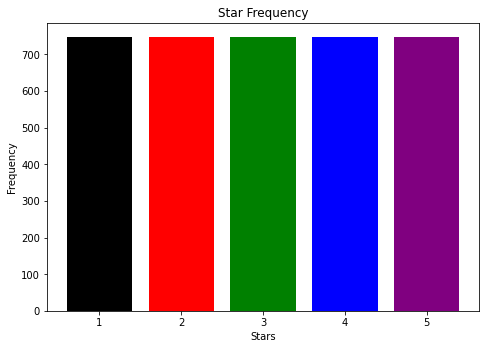

In [ ]:
#Star Frequency after normalizing
fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
strs_2 = [1, 2, 3, 4, 5]
vals_2 = [new_frq[0], new_frq[1], new_frq[2], new_frq[3], new_frq[4]]
ax_2.bar(strs_2, vals_2, color = ['black', 'red', 'green', 'blue', 'purple'])
plt.title('Star Frequency')
plt.ylabel('Frequency')
plt.xlabel('Stars')

In [ ]:
# Removal of stopwords and punctuation
def preprocess(text):
    remove_punc = [char for char in text if char not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    lwr = [word.lower() for word in remove_punc.split()]
    words = [word for word in lwr if word not in stopwords.words('english')]
    return words

In [ ]:
# Convert text into a vector and eliminate stopwords

# (THIS STEP MAY TAKE A WHILE TO PROCESS)
vocab = CountVectorizer(analyzer = preprocess).fit(new_x)

new_x = vocab.transform(new_x)

In [ ]:
# Splitting data with 75/25 ratio 
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.25,random_state=101)

# Training data shape as in sparse matrix
print('Training set shapes: ')
print('x: ', x_train.shape)
print('y: ', y_train.shape)
print('\n')


# Training data shape as in sparse matrix
print('Testing set shapes: ')
print('x: ', x_test.shape)
print('y: ', y_test.shape)
print('\n')

Training set shapes: 
x:  (2808, 22202)
y:  (2808,)


Testing set shapes: 
x:  (937, 22202)
y:  (937,)




**Five Supervised Machine Learning Models:**

In [ ]:
# Accuracy Score Holder
ac_scr = []

Naive Baiyes Model

Accuracy Score: 0.4589114194236926

Confusion Matrix for Multilayer Perceptron Classifier:


Text(0.5, 1.0, 'Multinomial Naive Bayes')

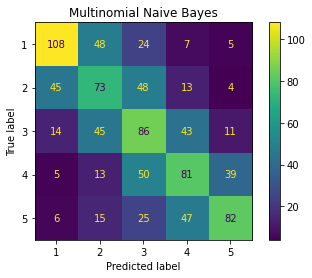

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

print('Naive Baiyes Model\n')

model_1 = MultinomialNB(alpha = 0.4).fit(x_train,y_train)


model_1_pred = model_1.predict(x_test)

#Confusion Matrix
pltcon_n = plot_confusion_matrix(model_1, x_test, y_test)

acc_score = accuracy_score(y_test, model_1_pred)
ac_scr.append(acc_score)

print('Accuracy Score: {}\n'.format(acc_score))
warnings.simplefilter(action = 'ignore', category = FutureWarning)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(pltcon_n)
plt.title("Multinomial Naive Bayes")

Accuracy Score: 0.4386339381003202

Confusion Matrix for Random Forest Classifier:


Text(0.5, 1.0, 'Random Forest')

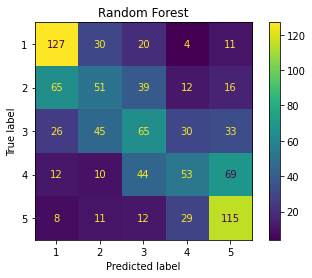

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier().fit(x_train,y_train)

model_2_pred = model_2.predict(x_test)


acc_score_2 = accuracy_score(y_test, model_2_pred)
ac_scr.append(acc_score_2)
print('Accuracy Score: {}\n'.format(acc_score_2))

#Confusion Matrix
pltcon_R = plot_confusion_matrix(model_2, x_test, y_test)
print("Confusion Matrix for Random Forest Classifier:")
print(pltcon_R)
plt.title("Random Forest")

Accuracy_score 0.3030949839914621
Confusion Matrix for Decision Tree Classifier:


Text(0.5, 1.0, 'Decision Tree')

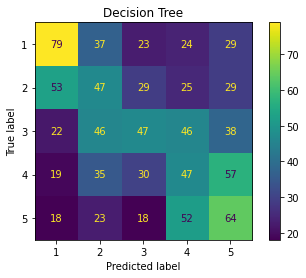

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier().fit(x_train,y_train)

model_3_pred = model_3.predict(x_test)
ac = accuracy_score(y_test, model_3_pred)
ac_scr.append(ac)

print('Accuracy_score {}'.format(ac))

#Confusion Matrix
pltcon_DT = plot_confusion_matrix(model_3, x_test, y_test)
print("Confusion Matrix for Decision Tree Classifier:")
print(pltcon_DT)
plt.title("Decision Tree")

Accuracy_score 0.4386339381003202
Confusion Matrix for SVC Classifier:


Text(0.5, 1.0, 'Support Vector Classification')

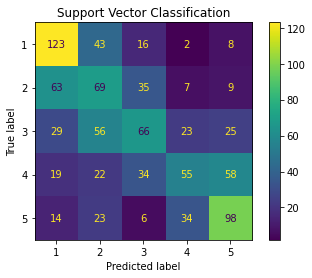

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

model_4 = SVC().fit(x_train,y_train)

model_4_pred = model_4.predict(x_test)

ac_4 = accuracy_score(y_test, model_4_pred)
ac_scr.append(ac_4)

print('Accuracy_score {}'.format(ac_4))

#Confusion Matrix
pltcon_svm = plot_confusion_matrix(model_4, x_test, y_test)
print("Confusion Matrix for SVC Classifier:")
print(pltcon_svm)
plt.title("Support Vector Classification")

Accuracy_score 0.2934898612593383
Confusion Matrix for KNN:


Text(0.5, 1.0, 'K Nearest Neighbour Algorithm')

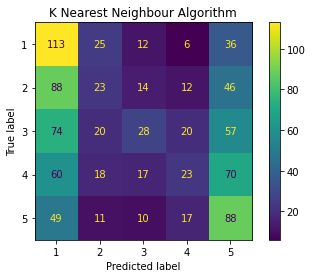

In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier(n_neighbors = 6).fit(x_train,y_train)

model_5_pred = model_5.predict(x_test)

ac_5 = accuracy_score(y_test, model_5_pred)
ac_scr.append(ac_5)
print('Accuracy_score {}'.format(ac_5))

#Confusion Matrix
pltcon_k = plot_confusion_matrix(model_5, x_test, y_test)
print("Confusion Matrix for KNN:")
print(pltcon_k)
plt.title("K Nearest Neighbour Algorithm")

Accuracy_score 0.43543223052294555
Confusion Matrix for Multilayer Perceptron Classifier:


Text(0.5, 1.0, 'Multilayer Perceptron Classifier')

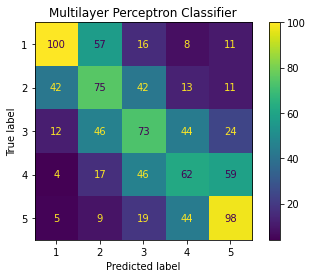

In [ ]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier

model_6 = MLPClassifier(hidden_layer_sizes = (100,)).fit(x_train,y_train)


model_6_pred = model_6.predict(x_test)
ac_6 = accuracy_score(y_test, model_6_pred)

ac_scr.append(ac_6)
print('Accuracy_score {}'.format(ac_6))

#Confusion Matrix
pltcon_m = plot_confusion_matrix(model_6, x_test, y_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(pltcon_m)
plt.title("Multilayer Perceptron Classifier")

Text(0, 0.5, 'Accuracy Score')

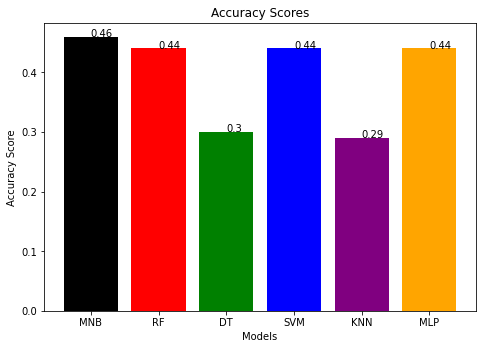

In [ ]:
#Accuracy scores before optimization
for i in range(len(ac_scr)):
  ac_scr[i] = round(ac_scr[i], 2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# Accuracy Plot
fig_3 = plt.figure()
ax_3 = fig_3.add_axes([0,0,1,1])
strs_3 = ['MNB', 'RF', 'DT', 'SVM', 'KNN', 'MLP']
vals_3 = [ac_scr[0],ac_scr[1],ac_scr[2], ac_scr[3], ac_scr[4], ac_scr[5]]
ax_3.bar(strs_3, vals_3, color = ['black', 'red', 'green', 'blue', 'purple', 'orange'])
addlabels(strs_3, vals_3)
plt.title('Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
